# Device Vendor Classifier

## Get nPrint-wlan output

In [2]:
filename = 'wlan_2020_11_05_03'
# cmd_test = f'nprint -w -P {filename}.pcap -W {filename}.npt'
cmd_test = f'../nprint -w -P {filename}.pcap -W {filename}.npt'
!{cmd_test}

## Print

In [3]:
import pandas as pd

nprint_wlan = pd.read_csv(f'{filename}.npt', index_col=0)

print('nPrint_wlan: Number of Packets: {0}, Features per packet: {1}'.format(nprint_wlan.shape[0], nprint_wlan.shape[1]))
nprint_wlan

nPrint_wlan: Number of Packets: 4422, Features per packet: 528


,radiotap_reversion_0,radiotap_reversion_1,radiotap_reversion_2,radiotap_reversion_3,radiotap_reversion_4,radiotap_reversion_5,radiotap_reversion_6,radiotap_reversion_7,radiotap_pad_0,radiotap_pad_1,...,wlan_rx_addr_38,wlan_rx_addr_39,wlan_rx_addr_40,wlan_rx_addr_41,wlan_rx_addr_42,wlan_rx_addr_43,wlan_rx_addr_44,wlan_rx_addr_45,wlan_rx_addr_46,wlan_rx_addr_47
src_mac,,,,,,,,,,,,,,,,,,,,,
f8:bc:0e:53:3d:a9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
f8:bc:0e:53:3d:a3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
f8:bc:0e:53:3d:a6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
f8:bc:0e:53:3d:a9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
f8:bc:0e:53:3d:a3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cc:f4:11:29:f8:89,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
82:f2:9e:2f:34:d8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
bc:ff:eb:f2:b7:88,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Drop samples without src_mac 

In [4]:
nprint_wlan_with_src_mac = nprint_wlan.loc[nprint_wlan.index != 'None']
print('nprint_wlan_with_src_mac: Number of Packets: {0}, Features per packet: {1}'.format(nprint_wlan_with_src_mac.shape[0], nprint_wlan_with_src_mac.shape[1]))

num_sample_packets = nprint_wlan_with_src_mac.shape[0]

nprint_wlan_with_src_mac: Number of Packets: 3910, Features per packet: 528


## MAC OUI to Vendor

In [5]:
vender_map = {} # key: mac, '00:00:01', value: ('short name', 'long name')
manuf_path = 'MAC_OUI/manuf.txt'

def load_vender_map():
    with open(manuf_path) as f:
        for line in f:
            line = line.strip()
            if not line: continue
            if line.startswith('#'): continue
            if '#' in line: line = line[:line.index('#')].strip()
            
            lsp = list(filter(None, line.split('\t')))
            assert 2 <= len(lsp) <= 3, f'{line}, {lsp}'

            if len(lsp) == 2: mac, sname, lname = lsp[0], lsp[1], lsp[1]
            else: mac, sname, lname = lsp

            if mac.endswith('/28'): # eample: 00:55:DA:00:00:00/28
                mac = mac[:10]
            
            vender_map[mac] = (sname, lname)

load_vender_map()

In [6]:
def get_vendor(mac: str):
    mac = mac.upper()
    if mac[:8] in vender_map.keys():
        return vender_map[mac[:8]][0]
    if mac[:10] in vender_map.keys():
        return vender_map[map[:10]][0]
    return 'None'

## List all vendors

In [7]:
from collections import Counter

c = Counter([get_vendor(row.name) for _, row in nprint_wlan_with_src_mac.iterrows()])

c.most_common()

[('None', 769),
 ('Motorola', 700),
 ('eero', 560),
 ('ARRISGro', 425),
 ('2Wire', 418),
 ('Google', 315),
 ('HewlettP', 213),
 ('ASUSTekC', 170),
 ('Pegatron', 89),
 ('Tp-LinkT', 86),
 ('BelkinIn', 46),
 ('HonHaiPr', 40),
 ('Chongqin', 20),
 ('Netgear', 19),
 ('Shenzhen', 16),
 ('Technico', 7),
 ('IntelCor', 5),
 ('Apple', 5),
 ('OnePlusT', 2),
 ('Sonos', 2),
 ('AmazonTe', 2),
 ('TexasIns', 1)]

## Top 10 Vendors

In [8]:
top_10_vendor = []
for vendor, n_packets in c.most_common():
    if len(top_10_vendor) > 10: break
    if vendor == 'None': continue
    if n_packets < num_sample_packets / 100: break

    top_10_vendor.append(vendor)

top_10_vendor    

['Motorola',
 'eero',
 'ARRISGro',
 '2Wire',
 'Google',
 'HewlettP',
 'ASUSTekC',
 'Pegatron',
 'Tp-LinkT',
 'BelkinIn',
 'HonHaiPr']

## Samples and Lables

- Samples: nprint_wlan_with_src_mac
- Lables: if the src_mac belongs to Apple

In [9]:
import numpy as np

samples = []
labels = []

samples_without_vendor = []

for _, row in nprint_wlan_with_src_mac.iterrows():
    vendor = get_vendor(row.name)
    
    if vendor == 'None':
        samples_without_vendor.append(np.array(row))
    else: 
        samples.append(np.array(row))
        if vendor in top_10_vendor:
            labels.append(vendor)
        else:
            labels.append('Others')
    

print(f'Samples: {len(samples)}, Features: {len(samples[0])}')
print(f'None Samples: {len(samples_without_vendor)}')
print(f'{Counter(labels)}')

Samples: 3141, Features: 528
None Samples: 769
Counter({'Motorola': 700, 'eero': 560, 'ARRISGro': 425, '2Wire': 418, 'Google': 315, 'HewlettP': 213, 'ASUSTekC': 170, 'Pegatron': 89, 'Tp-LinkT': 86, 'Others': 79, 'BelkinIn': 46, 'HonHaiPr': 40})


## Training

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(samples, labels)

# Initialize Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)

# Train 
clf.fit(X_train, y_train) 

# Predict
y_pred = clf.predict(X_test)

# Statistics

# First, lets get a stat report about the precision and recall:
report = classification_report(y_test, y_pred)
print(report)

# # Let's also get the ROC AUC score while we're here, which requires a probability instead of just the prediction
# y_pred_proba = clf.predict_proba(X_test)
# # predict_proba gives us a probability estimate of each class, while roc_auc just cares about the "positive" class
# y_pred_proba_pos = [sublist[1] for sublist in y_pred_proba]
# roc = roc_auc_score(y_test, y_pred_proba_pos)
# print('ROC AUC Score: {0}'.format(roc))

              precision    recall  f1-score   support

       2Wire       0.87      1.00      0.93        94
    ARRISGro       0.95      1.00      0.97       108
    ASUSTekC       0.98      0.98      0.98        42
    BelkinIn       0.92      0.86      0.89        14
      Google       0.99      0.97      0.98        70
    HewlettP       0.97      0.98      0.98        61
    HonHaiPr       1.00      1.00      1.00        11
    Motorola       1.00      0.95      0.97       188
      Others       0.79      0.69      0.73        16
    Pegatron       1.00      0.86      0.93        22
    Tp-LinkT       1.00      0.78      0.88        18
        eero       1.00      1.00      1.00       142

    accuracy                           0.96       786
   macro avg       0.95      0.92      0.94       786
weighted avg       0.97      0.96      0.96       786



## Draw Confusion Matrix

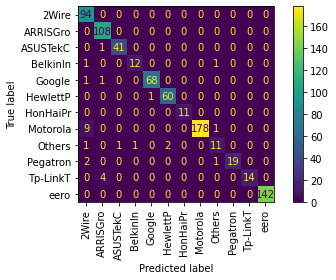

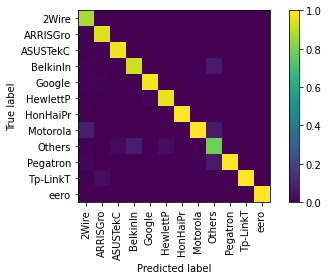

In [17]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig('../imgs/sample-1_01.png', transparent=False)
plt.show()

plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', normalize='pred', include_values=False)
plt.tight_layout()
plt.savefig('../imgs/sample-1_02.png', transparent=False)
plt.show()

## Classify samples_without_vendor

In [18]:
y_samples_without_vendor = clf.predict(samples_without_vendor)

Counter(y_samples_without_vendor)

Counter({'ARRISGro': 295,
         'Pegatron': 332,
         'Others': 25,
         '2Wire': 44,
         'Motorola': 35,
         'BelkinIn': 36,
         'Tp-LinkT': 2})

## If we use another dataset
- test = 'wlan_2020_11_05_02'


In [19]:
test_file = 'wlan_2020_11_05_02'
cmd_test = f'../nprint -w -P {test_file}.pcap -W {test_file}.npt'
!{cmd_test}

nprint_wlan_test = pd.read_csv(f'{test_file}.npt', index_col=0)
print('nPrint_wlan: Number of Packets: {0}, Features per packet: {1}'.format(nprint_wlan_test.shape[0], nprint_wlan_test.shape[1]))

# Drop samples without src_mac
nprint_wlan_test_with_src_mac = nprint_wlan_test.loc[nprint_wlan_test.index != 'None']

c = Counter([get_vendor(row.name) for _, row in nprint_wlan_test_with_src_mac.iterrows()])
c.most_common()

nPrint_wlan: Number of Packets: 4782, Features per packet: 528


[('eero', 3604),
 ('HewlettP', 633),
 ('Google', 470),
 ('None', 24),
 ('Chongqin', 14),
 ('IntelCor', 6),
 ('Apple', 2),
 ('TexasIns', 1)]

In [20]:
test_samples = []
test_labels = []

test_samples_without_vendor = []

for _, row in nprint_wlan_test_with_src_mac.iterrows():
    vendor = get_vendor(row.name)

    if vendor == 'None': 
        test_samples_without_vendor.append(np.array(row))
    else:
        test_samples.append(np.array(row))
        if vendor in top_10_vendor:
            test_labels.append(vendor)
        else:
            test_labels.append('Others')

print(f'samples: {len(test_samples)}, {len(test_samples[0])}, lables: {len(test_labels)}')

samples: 4730, 528, lables: 4730


In [21]:
X_test = test_samples
y_test = test_labels

# Predict
y_pred = clf.predict(X_test)

# Statistics

# First, lets get a stat report about the precision and recall:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    ARRISGro       0.00      0.00      0.00         0
    ASUSTekC       0.00      0.00      0.00         0
      Google       0.59      0.98      0.74       470
    HewlettP       0.96      0.52      0.67       633
      Others       0.29      0.09      0.13        23
    Pegatron       0.00      0.00      0.00         0
        eero       1.00      1.00      1.00      3604

    accuracy                           0.93      4730
   macro avg       0.41      0.37      0.36      4730
weighted avg       0.95      0.93      0.93      4730



## Plot confusion matrix for the test pcap

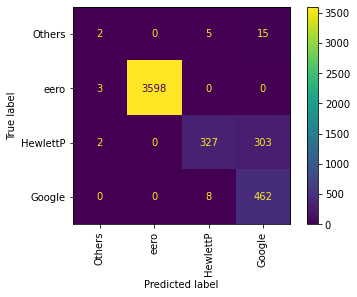

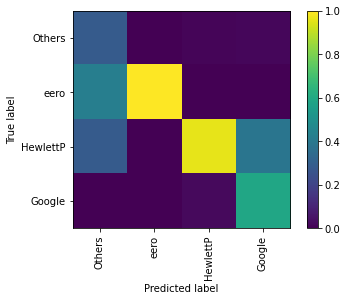

In [30]:
labels = ['Others']

for vendor, _ in c.most_common():
    if vendor in top_10_vendor:
        labels.append(vendor)

plot_confusion_matrix(clf, X_test, y_test, labels=labels, xticks_rotation='vertical')
plt.show()

plot_confusion_matrix(clf, X_test, y_test, labels=labels, xticks_rotation='vertical', normalize='pred', include_values=False)
plt.show()